In [ ]:
import pandas as pd

In [ ]:
!pip install geopandas
import geopandas # installazione geopandas

In [ ]:
import pandas as pd #importazione pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
AreaSosta = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_areesosta.zip')
AreaSosta # creazione di un geodataframe prendendo i dati una cartella zippata nel drive


,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991)
1,4,1545,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697)
2,8,6330,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628)
3,9,7165,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228)
4,10,6660,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506)
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530)
1518,3233,1242,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584)
1519,3234,1242,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568)
1520,3235,1242,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532)


In [ ]:
QtMilano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm')
QtMilano # creazione di un geodataframe prendendo i dati una cartella zippata nel drive


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
Stradario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stradario.csv')
Stradario

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
2,3123,VIA,A.DEL SARTO,3,NaN,129,665,3
3,3123,VIA,A.DEL SARTO,4,NaN,129,665,3
4,3123,VIA,A.DEL SARTO,5,NaN,129,665,3
...,...,...,...,...,...,...,...,...
51318,6318,VIA,ZURIGO,24,NaN,147,394,7
51319,6318,VIA,ZURIGO,24,4,147,394,7
51320,6318,VIA,ZURIGO,25,NaN,147,1412,6
51321,6318,VIA,ZURIGO,28,NaN,147,539,7


# Situazione


Il Comune di Milano vuole fare un'analisi riguardante le aree di sosta per il parcheggio delle biciclette.
Ha messo a disposizione quindi tre dataset (in allegato) e ha chiesto di avere un report con le seguenti informazioni:


- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
AreaSosta.dtypes #controlla i tipi di tutte le colonne


id_amat          int64
id_via          object
num_civico      object
municipio       object
stato           object
categoriev      object
numero_man       int64
stalli_per       int64
stalli_tot       int64
tipomanufa      object
ubicazione      object
geometry      geometry
dtype: object

In [ ]:
AreaSosta[AreaSosta['id_via'].isnull()]# cercare se ci sono campi vuoti in una colonna 

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
50,65,None,0,5,Esistente,Velocipedi,1,5,5,Verona _ Ambrogio,Area verde ? Giardino ? Parco,POINT (9.17257 45.42040)


In [ ]:
AreaSosta2 = AreaSosta.drop(AreaSosta[AreaSosta["id_via"].isnull()].index) #dataframe senza il dato sopra tolto
AreaSosta2

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991)
1,4,1545,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697)
2,8,6330,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628)
3,9,7165,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228)
4,10,6660,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506)
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530)
1518,3233,1242,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584)
1519,3234,1242,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568)
1520,3235,1242,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532)


In [ ]:
AreaSosta2['id_via']=AreaSosta2['id_via'].astype(int) #modifica as intero tutti i campi devono essere riempiti non possono esserci campi vuoti

In [ ]:
area_di_sosta=pd.merge(AreaSosta2,Stradario,how='inner',left_on=['id_via'],right_on=['CODICE_VIA']) 
area_di_sosta[['DESCRIZIONE_VIA','CIVICO','stalli_tot']]

,DESCRIZIONE_VIA,CIVICO,stalli_tot
0,ABBIATEGRASSO,1,15
1,ABBIATEGRASSO,2,15
2,ABBIATEGRASSO,7,15
3,ABBIATEGRASSO,8,15
4,ABBIATEGRASSO,12,15
...,...,...,...
39919,SAN DIONIGI,117,30
39920,SAN DIONIGI,119,30
39921,SAN DIONIGI,120,30
39922,SAN DIONIGI,121,30


- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [ ]:
Analogo_Quartieri=geopandas.sjoin(area_di_sosta,QtMilano,op='within',how='left')
y = Analogo_Quartieri[['DESCRIZIONE_VIA','CIVICO','stalli_tot','NIL']]
y

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,DESCRIZIONE_VIA,CIVICO,stalli_tot,NIL
0,ABBIATEGRASSO,1,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1,ABBIATEGRASSO,2,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2,ABBIATEGRASSO,7,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3,ABBIATEGRASSO,8,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4,ABBIATEGRASSO,12,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...,...,...,...,...
39919,SAN DIONIGI,117,30,SCALO ROMANA
39920,SAN DIONIGI,119,30,SCALO ROMANA
39921,SAN DIONIGI,120,30,SCALO ROMANA
39922,SAN DIONIGI,121,30,SCALO ROMANA


- i nomi dei quartieri in cui non ci sono aree di sosta;


In [ ]:
No_aree=QtMilano[QtMilano.intersects(AreaSosta.unary_union)==False]
No_aree

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
22,75,STEPHENSON,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3582.570059,5.600844e+05,111,"POLYGON ((9.13009 45.50820, 9.13016 45.50784, ..."
23,47,CANTALUPA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5161.415348,9.266817e+05,112,"POLYGON ((9.16112 45.42589, 9.16270 45.42544, ..."
24,39,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113,"POLYGON ((9.21047 45.39699, 9.21039 45.39698, ..."
28,88,PARCO BOSCO IN CITTA',05/02/2020,Vigente,Milano 2030 - PGT Approvato,37072.981211,7.834006e+06,117,"POLYGON ((9.07309 45.50604, 9.07326 45.50589, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,1.888634e+05,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."
48,31,MONLUE' - PONTE LAMBRO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9835.924371,2.629018e+06,137,"POLYGON ((9.27271 45.46079, 9.27276 45.46072, ..."
54,34,CHIARAVALLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2927.691044,3.094942e+05,143,"POLYGON ((9.24507 45.41742, 9.24303 45.41508, ..."


- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

In [ ]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.8 MB/s 


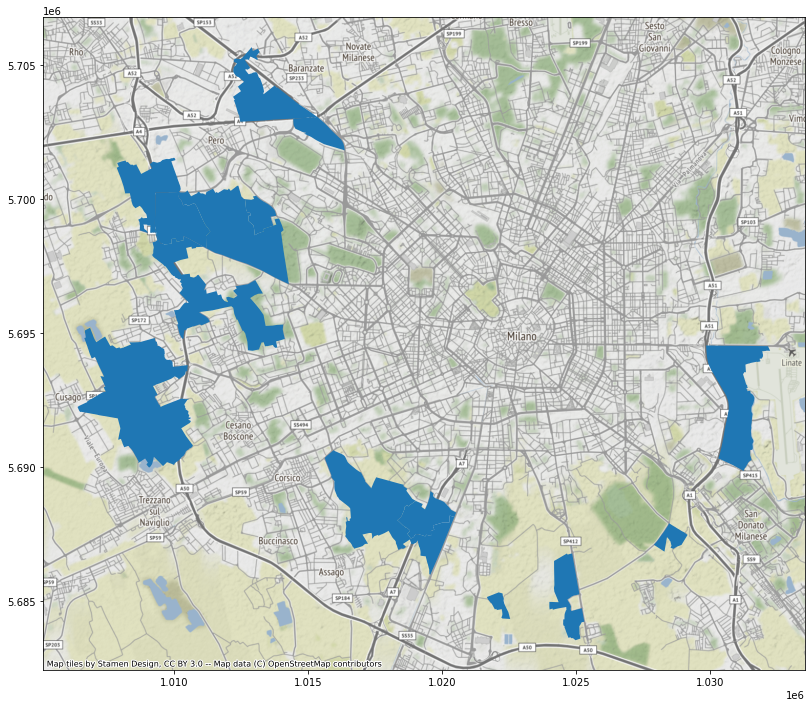

In [ ]:
ax=No_aree.to_crs(epsg=3857).plot(figsize=(20,12))
ctx.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [ ]:
Analogo_Quartieri

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,1,NaN,142,2066,5,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
1,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,2,NaN,142,2066,5,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
2,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,7,NaN,142,2066,5,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
3,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,8,NaN,142,2066,5,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
4,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,12,NaN,142,2066,5,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39919,3243,4290,36,5,Esistente,Velocipedi,6,5,30,Verona _ Ambrogio,Area verde ? Giardino ? Parco,POINT (9.21895 45.43356),4290,VIA,SAN DIONIGI,117,A,139,947,4,61.0,36.0,SCALO ROMANA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7108.599989,1.736689e+06,150.0
39920,3243,4290,36,5,Esistente,Velocipedi,6,5,30,Verona _ Ambrogio,Area verde ? Giardino ? Parco,POINT (9.21895 45.43356),4290,VIA,SAN DIONIGI,119,A,139,947,4,61.0,36.0,SCALO ROMANA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7108.599989,1.736689e+06,150.0
39921,3243,4290,36,5,Esistente,Velocipedi,6,5,30,Verona _ Ambrogio,Area verde ? Giardino ? Parco,POINT (9.21895 45.43356),4290,VIA,SAN DIONIGI,120,NaN,139,946,5,61.0,36.0,SCALO ROMANA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7108.599989,1.736689e+06,150.0
39922,3243,4290,36,5,Esistente,Velocipedi,6,5,30,Verona _ Ambrogio,Area verde ? Giardino ? Parco,POINT (9.21895 45.43356),4290,VIA,SAN DIONIGI,121,NaN,139,947,4,61.0,36.0,SCALO ROMANA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7108.599989,1.736689e+06,150.0


In [ ]:
Q_max_aree_sosta = Analogo_Quartieri.groupby('NIL').count().sort_values('DESCRIZIONE_VIA', ascending=False) 
Q_max_aree_sosta.head(1).index                                                                               #prendo solamente l'indice (1) della series che contiene il nome del Q.
                                                                                                             

Index(['LORETO - CASORETTO - NOLO'], dtype='object', name='NIL')

In [ ]:
x = QtMilano[QtMilano.NIL.isin(Q_max_aree_sosta.head(1).index)]                                              #salvo i dati del quartiere che ho trovato sopra    
x

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
6,20,LORETO - CASORETTO - NOLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5631.442413,1.747499e+06,95,"POLYGON ((9.23044 45.49250, 9.23090 45.49197, ..."


- una mappa di Milano con l'indicazione 
del quartiere con più aree di sosta;

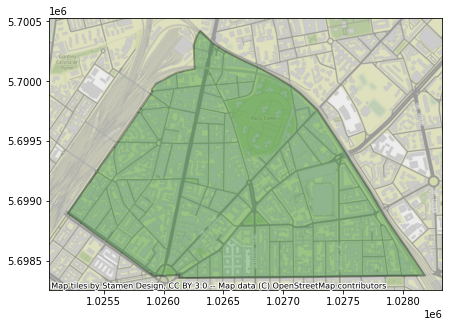

In [ ]:
ax = x.to_crs(epsg=3857).plot(facecolor='g', edgecolor='k', figsize= (10,5), linewidth=2, alpha=0.3)      #plotto il quartiere 
ctx.add_basemap(ax) 

- i nomi dei quartieri con un numero di aree di sosta minori della media

In [ ]:
Q_max_aree_sosta.stalli_tot.mean()

515.7894736842105

In [ ]:
quart_min_media =  Q_max_aree_sosta[Q_max_aree_sosta.stalli_tot < Q_max_aree_sosta.stalli_tot.mean()]
quart_min_media[['stalli_tot']]
quart_min_media

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
NIL,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFORI,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,67,491,491,491,491,491,491,491,491,491,491,491
MAGENTA - S. VITTORE,474,474,468,474,474,474,474,474,474,474,474,474,474,474,474,474,30,474,474,474,474,474,474,474,474,474,474,474
STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA FALLATA,469,469,363,469,469,469,469,469,469,469,469,469,469,469,469,469,51,469,469,469,469,469,469,469,469,469,469,469
DE ANGELI - MONTE ROSA,454,454,339,454,454,454,454,454,454,454,454,454,454,454,454,454,20,454,454,454,454,454,454,454,454,454,454,454
PAGANO,447,447,415,447,447,447,447,447,447,447,447,447,447,447,447,447,33,447,447,447,447,447,447,447,447,447,447,447
MACIACHINI - MAGGIOLINA,445,445,303,445,445,445,445,445,445,445,445,445,445,445,445,445,24,445,445,445,445,445,445,445,445,445,445,445
BANDE NERE,444,444,340,444,444,444,444,444,444,444,444,444,444,444,444,444,85,444,444,444,444,444,444,444,444,444,444,444
LORENTEGGIO,428,428,406,428,428,428,428,428,428,428,428,428,428,428,428,428,45,428,428,428,428,428,428,428,428,428,428,428
XXII MARZO,409,409,396,409,409,409,409,409,409,409,409,409,409,409,409,409,29,409,409,409,409,409,409,409,409,409,409,409


- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media

In [ ]:
quart_min_media_mappa = geopandas.sjoin(Comuni2,Province2,op='within', how='left') #la geometria del df è dei comuni
ComuniProvince_mappa